In [307]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/evolution-of-rubiks-cube-solve-times/all_comp.csv
/kaggle/input/evolution-of-rubiks-cube-solve-times/best_singles.csv
/kaggle/input/evolution-of-rubiks-cube-solve-times/best_averages.csv


In [308]:
import matplotlib.pyplot as plt

# Introduction

Hello everyone, this is a Exploratory Data Analysis (EDA) on the Rubiks Cube dataset best_averages data. Using this to enhance my Data Science skills and starting to learn Machile Learning.

Step by step was inspired in the EDA Pandas tutorial, which you can take a look [here](https://www.youtube.com/watch?v=xi0vhXFPegw).

Hope you find it useful. If you have any suggestion on improvements, please feel free to comment it.

# Step 1: Data Understanding
- Dataframe shape
- `head` and `tail`
- `dtypes`
- `describe`

In [309]:
df = pd.read_csv("/kaggle/input/evolution-of-rubiks-cube-solve-times/best_averages.csv")

In [310]:
df.shape

(1000, 6)

In [311]:
df.head(20)

,Unnamed: 0,rank,name,time,country,competition
0,0,1,Ruihang Xu (许瑞航),5.48,China,Wuhan Open 2021
1,1,2,Feliks Zemdegs,5.53,Australia,Odd Day in Sydney 2019
2,2,3,Tymon Kolasiński,5.54,Poland,LLS II Biała Podlaska 2021
3,3,4,Yezhen Han (韩业臻),5.57,China,Guangdong Open 2021
4,4,5,Max Park,5.59,United States,Houston Winter 2020
5,5,6,Patrick Ponce,5.83,United States,GA Cubers Return A 2021
6,6,7,Sean Patrick Villanueva,5.98,Philippines,Marikina City Open II 2019
7,7,8,Luke Garrett,6.01,United States,Florida Returns 2021
8,8,9,Matty Hiroto Inaba,6.05,United States,Idaho Summer B 2021
9,9,10,Philipp Weyer,6.06,Germany,Swisscubing Cup Final 2018


In [312]:
df.columns

Index(['Unnamed: 0', 'rank', 'name', 'time', 'country', 'competition'], dtype='object')

In [313]:
df.dtypes

Unnamed: 0       int64
rank             int64
name            object
time           float64
country         object
competition     object
dtype: object

In [314]:
df.describe()

,Unnamed: 0,rank,time
count,1000.000000,1000.000000,1000.000000
mean,499.500000,497.813000,8.218740
std,288.819436,287.627035,0.679811
min,0.000000,1.000000,5.480000
25%,249.750000,250.000000,7.860000
50%,499.500000,497.500000,8.375000
75%,749.250000,745.000000,8.760000
max,999.000000,993.000000,9.050000


# Step 2: Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [315]:
# Removing unnamed
df = df[['rank', 'name', 'time', 'country', 'competition']]

In [316]:
df.columns

Index(['rank', 'name', 'time', 'country', 'competition'], dtype='object')

In [317]:
df.isna().sum() # Result: No null columns, don't need to clean it

rank           0
name           0
time           0
country        0
competition    0
dtype: int64

In [318]:
df.loc[df.duplicated(subset=['rank'])] # Just to check if dataset has same rankings

,rank,name,time,country,competition
17,17,Lukas Shelley,6.31,Denmark,Kunshan Afternoon 2021
24,24,Kian Mansour,6.52,Canada,Pickering Spring 2018
31,31,Yusheng Du (杜宇生),6.64,China,Beijing Spring PM 2021
35,35,Tanzer Balimtas,6.70,United States,Rally In The Valley 2018
38,38,Hyeon Kyo Kyoung,6.73,Republic of Korea,Cubing Korea 2019
...,...,...,...,...,...
995,993,Junze Zhao (赵俊泽),9.05,China,Xuzhou Open 2018
996,993,Marwan Kamal,9.05,Canada,National Capital Region 2019
997,993,Mattheo de Wit,9.05,Netherlands,Hoogland Open 2019
998,993,Pierre Meunier,9.05,France,Elsass Open 2019


In [319]:
df.query('rank == 17') # Just to check if dataset has same rankings

,rank,name,time,country,competition
16,17,Leo Borromeo,6.31,Philippines,Negros Speedcubing Open 2019
17,17,Lukas Shelley,6.31,Denmark,Kunshan Afternoon 2021


In [320]:
# Extracting year and competition name from competition column

for index, row in df.iterrows():
    year = row['competition'][-5:]
    df.loc[index, 'year'] = year

# Alternative way is using vectorized string operations
df['competition_name'] = df['competition'].str[:-6]

In [321]:
# Trim spaces
df['year'] = pd.to_numeric(df['year'].str.strip())
df['competition_name'] = df['competition_name'].str.strip()

In [322]:
df.head(20)

,rank,name,time,country,competition,year,competition_name
0,1,Ruihang Xu (许瑞航),5.48,China,Wuhan Open 2021,2021,Wuhan Open
1,2,Feliks Zemdegs,5.53,Australia,Odd Day in Sydney 2019,2019,Odd Day in Sydney
2,3,Tymon Kolasiński,5.54,Poland,LLS II Biała Podlaska 2021,2021,LLS II Biała Podlaska
3,4,Yezhen Han (韩业臻),5.57,China,Guangdong Open 2021,2021,Guangdong Open
4,5,Max Park,5.59,United States,Houston Winter 2020,2020,Houston Winter
5,6,Patrick Ponce,5.83,United States,GA Cubers Return A 2021,2021,GA Cubers Return A
6,7,Sean Patrick Villanueva,5.98,Philippines,Marikina City Open II 2019,2019,Marikina City Open II
7,8,Luke Garrett,6.01,United States,Florida Returns 2021,2021,Florida Returns
8,9,Matty Hiroto Inaba,6.05,United States,Idaho Summer B 2021,2021,Idaho Summer B
9,10,Philipp Weyer,6.06,Germany,Swisscubing Cup Final 2018,2018,Swisscubing Cup Final


In [323]:
df.dtypes

rank                  int64
name                 object
time                float64
country              object
competition          object
year                  int64
competition_name     object
dtype: object

In [324]:
# Checking if there is any year diferent than 4 digits
year_invalid = df[df['year'].astype(str).str.len() != 4]
print(year_invalid)

Empty DataFrame
Columns: [rank, name, time, country, competition, year, competition_name]
Index: []


# Step 3: Feature Understanding
(Univariate analysis)
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

Text(0, 0.5, 'Number of Solving')

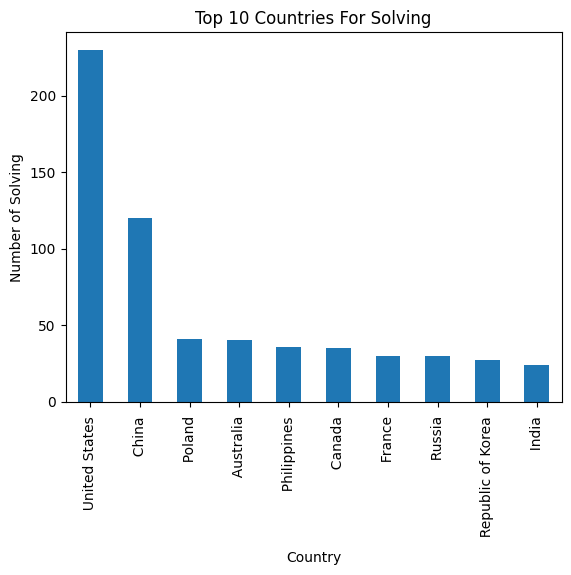

In [325]:
# Bar graph on records on each country
ax = df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries For Solving')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Solving')

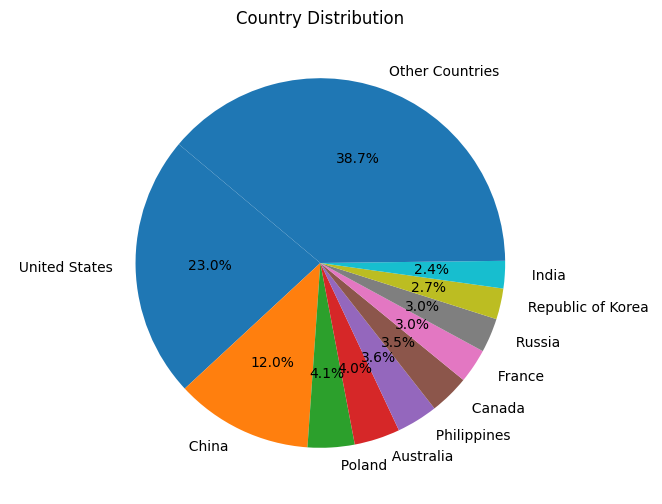

In [326]:
# Separate the top 10 countries
country_counts = df['country'].value_counts()
top_10_countries = country_counts.nlargest(10)
others_count = country_counts.iloc[10:].sum()
final_counts = pd.concat([top_10_countries, pd.Series({'Other Countries': others_count})])

# Create pie chart of most countries having solving times
plt.figure(figsize=(8, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Country Distribution')
plt.show()

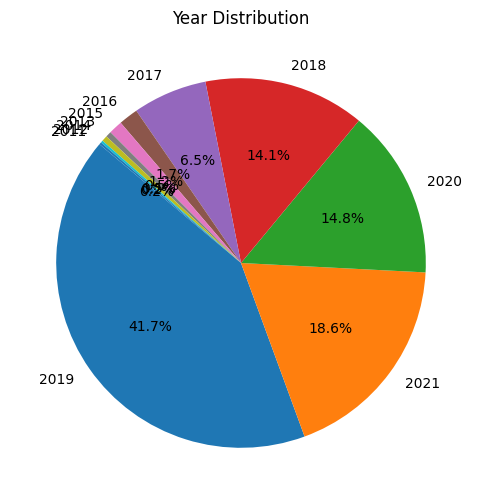

In [327]:
year_counts = df['year'].value_counts()

# Create pie chart of most years having solving times
plt.figure(figsize=(8, 6))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Year Distribution')
plt.show()

Text(0.5, 0, 'Time (seconds)')

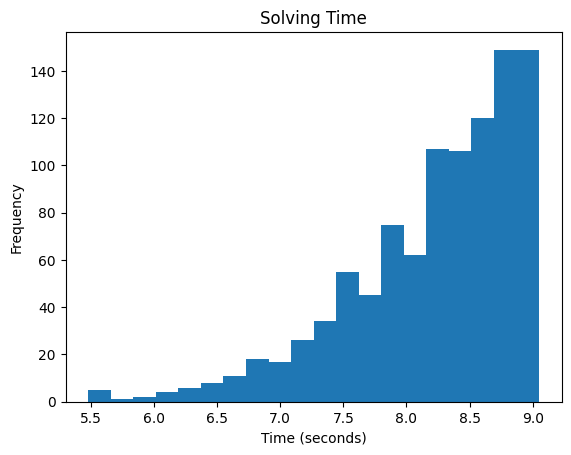

In [328]:
# Histogram on solving time
ax = df['time'].plot(kind='hist', bins=20, title='Solving Time')
ax.set_xlabel('Time (seconds)')

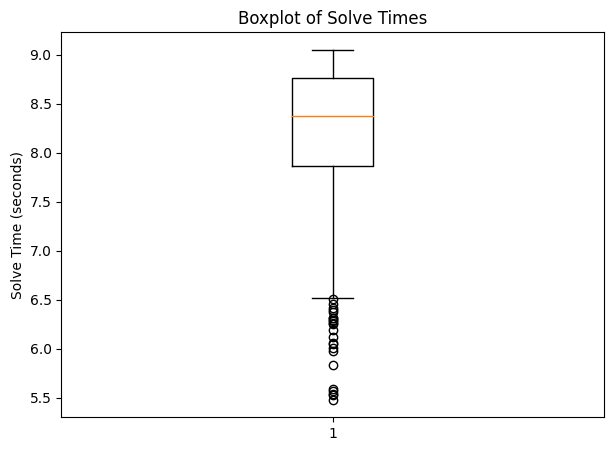

In [329]:
# Boxplot on solve times (Check if top ranks are outliers)
plt.figure(figsize=(7, 5))
plt.boxplot(df["time"])
plt.title("Boxplot of Solve Times")
plt.ylabel("Solve Time (seconds)")

plt.show()

Text(0.5, 0, 'Time (seconds)')

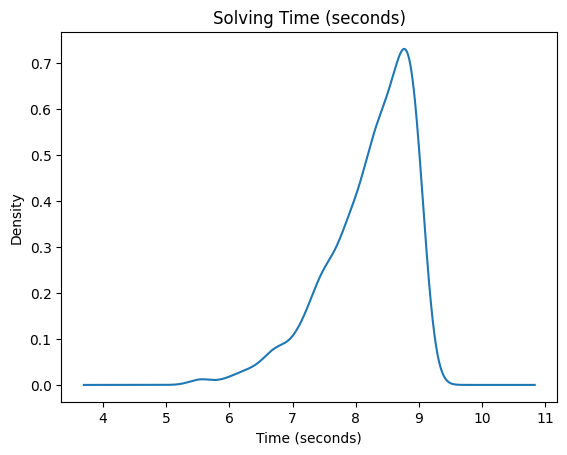

In [330]:
# KDE on solve times (Check density)
ax = df['time'].plot(kind='kde', title='Solving Time (seconds)')
ax.set_xlabel('Time (seconds)')

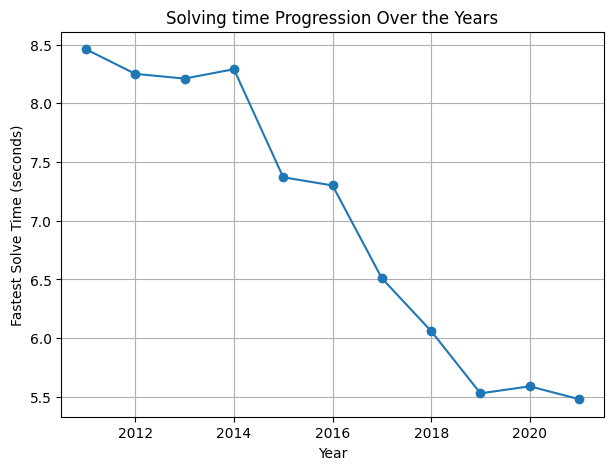

In [331]:
# Solving time progression over the years (minimum solve time per year)
plt.figure(figsize=(7, 5))
df.groupby("year")["time"].min().plot(marker='o', linestyle='-')
plt.title("Solving time Progression Over the Years")
plt.xlabel("Year")
plt.ylabel("Fastest Solve Time (seconds)")
plt.grid(True)
plt.show()

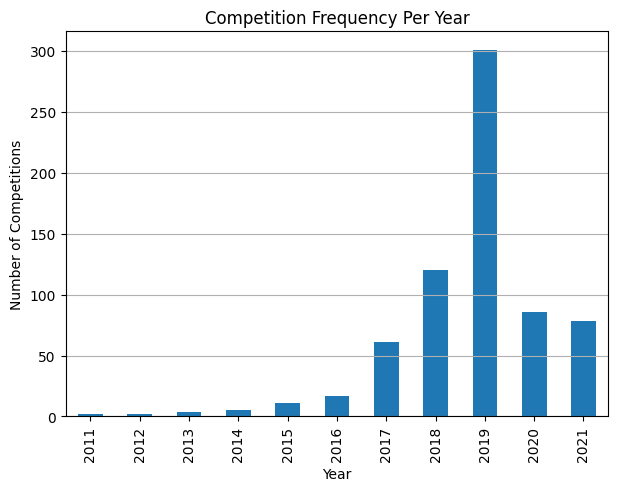

In [332]:
# Competition frequency per year
plt.figure(figsize=(7, 5))
# Drop duplicates to not count the same competition and year more that once
unique_competitions_per_year = df.drop_duplicates(subset=["year", "competition"]).copy()
unique_competitions_per_year["year"].value_counts().sort_index().plot(kind="bar")
plt.title("Competition Frequency Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Competitions")
plt.grid(axis="y")
plt.show()

<Figure size 1200x600 with 0 Axes>

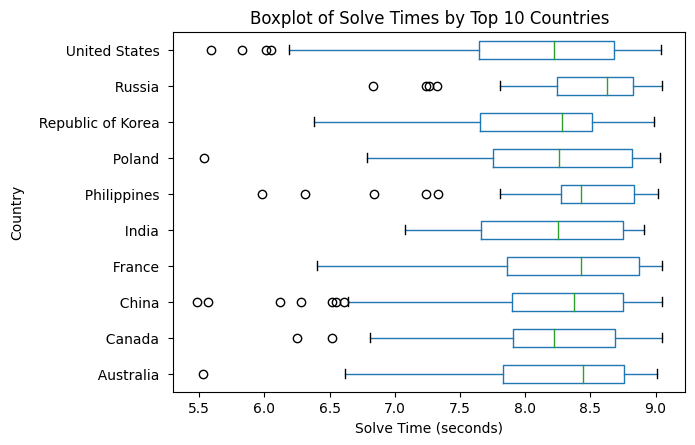

In [333]:
import matplotlib.pyplot as plt

# Get the top 10 countries with the most records
top_countries = df["country"].value_counts().nlargest(10).index
df_top_countries = df[df["country"].isin(top_countries)]

# Create a boxplot of solve times by top 10 countries
plt.figure(figsize=(12, 6))
df_top_countries.boxplot(column="time", by="country", vert=False, grid=False)

plt.title("Boxplot of Solve Times by Top 10 Countries")
plt.suptitle("")  # Remove default Matplotlib grouping title
plt.xlabel("Solve Time (seconds)")
plt.ylabel("Country")

plt.show()


Text(0, 0.5, 'Number of Solving')

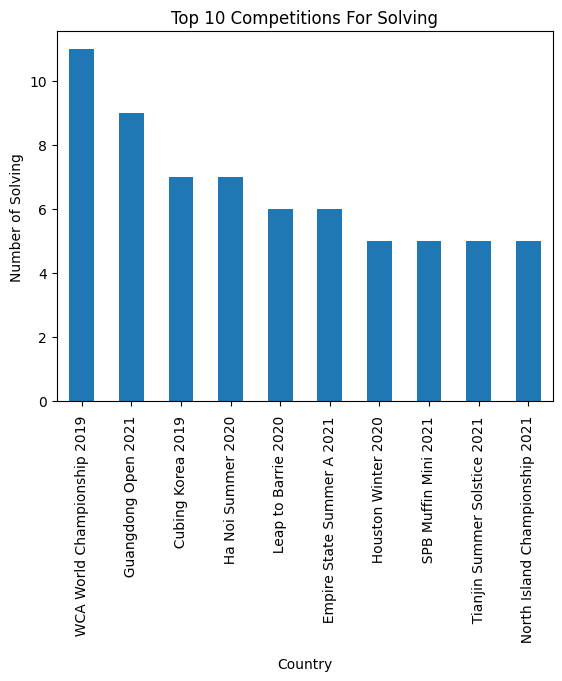

In [334]:
# Bar graph on competitions distribution
ax = df['competition'].value_counts().head(10).plot(kind='bar', title='Top 10 Competitions For Solving')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Solving')

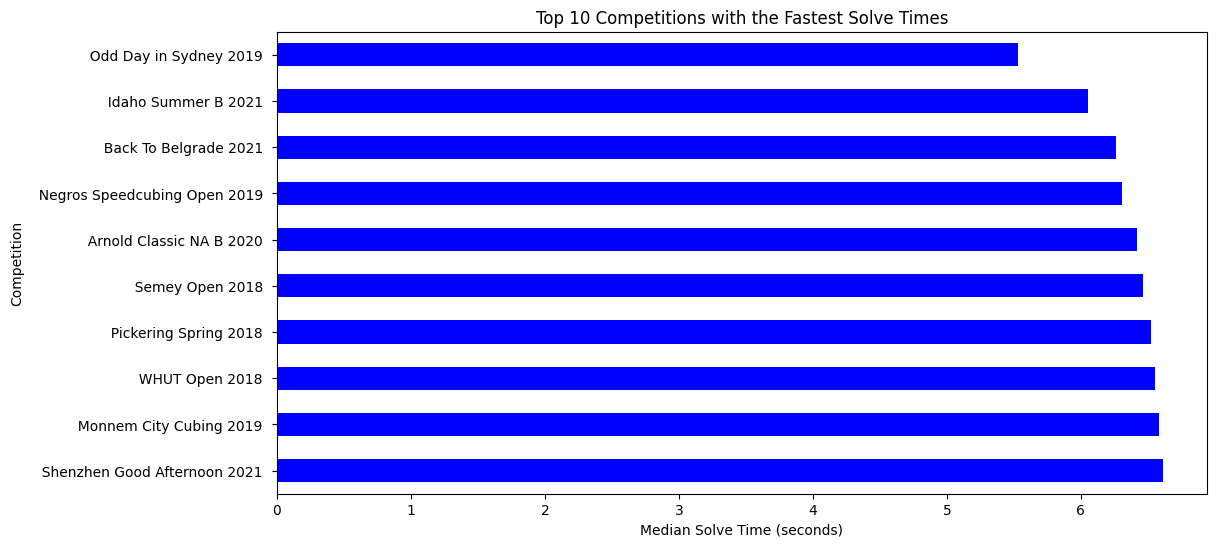

In [335]:
# Get the top 10 competitions with the lowest median solve times
top_competitions = df.groupby("competition")["time"].median().nsmallest(10)

plt.figure(figsize=(12, 6))
top_competitions.plot(kind="barh", color="blue")

plt.title("Top 10 Competitions with the Fastest Solve Times")
plt.xlabel("Median Solve Time (seconds)")
plt.ylabel("Competition")
plt.gca().invert_yaxis()  # Invert y-axis to show the fastest first

plt.show()


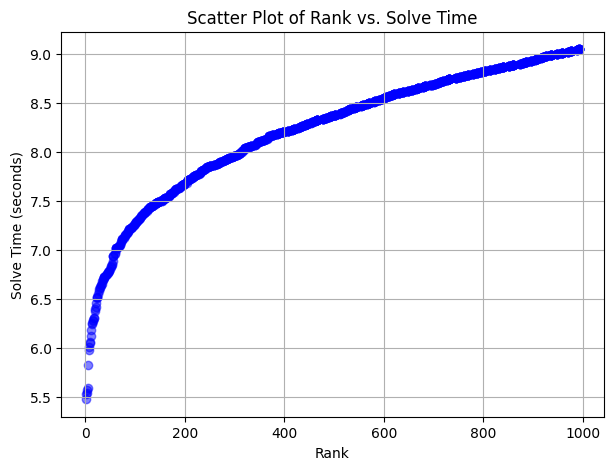

Correlation between Rank and Solve Time: 0.9359


In [336]:
# Scatter plot of rank vs. solve time
plt.figure(figsize=(7, 5))
plt.scatter(df["rank"], df["time"], alpha=0.5, color="blue")
plt.title("Scatter Plot of Rank vs. Solve Time")
plt.xlabel("Rank")
plt.ylabel("Solve Time (seconds)")
plt.grid(True)
plt.show()

# Correlation analysis between rank and solve time
correlation = df["rank"].corr(df["time"])
print(f"Correlation between Rank and Solve Time: {correlation:.4f}")